# Heart Disease Prediction

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
np.random.seed(42)

Here we will be experimenting with 5 algorithms

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
# rename a condition column as target
df.rename({'condition':'target'}, axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

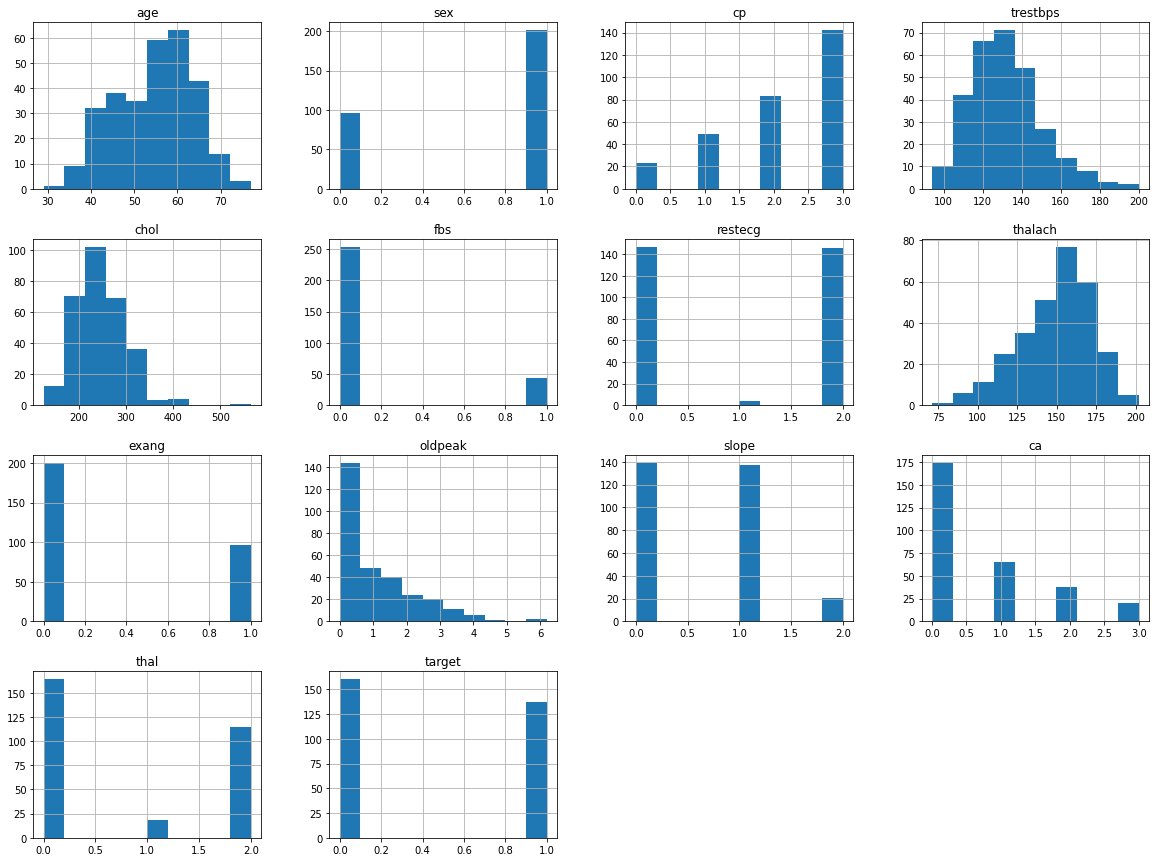

In [9]:
df.hist(bins=10, figsize=(20,15))

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

In [11]:
df['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

# Data Preprocessing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [12]:
dataset_df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [14]:
dataset_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


In [15]:
y = dataset_d['target']
X = dataset.drop(['target'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, random_state=42)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
y_test

167    1
211    1
63     0
154    0
5      0
77     0
183    1
158    1
9      0
139    0
285    0
78     0
92     0
101    0
42     0
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, y, cv=10)
scores

array([0.53333333, 0.76666667, 0.86666667, 0.9       , 0.8       ,
       0.9       , 1.        , 0.82758621, 0.79310345, 0.82758621])

In [21]:
# accuracy
scores.mean()

0.8214942528735631

In [22]:
scores.std()

0.11559247278620796

# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean().round(2))

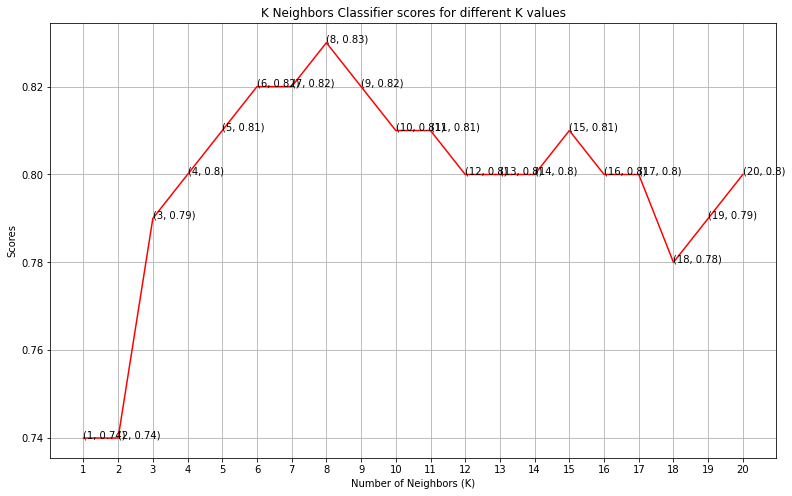

In [24]:
plt.figure(figsize=(13,8))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.grid(True)

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [26]:
# accuracy
score.mean()

0.8280459770114943

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc_scores = []
for n in range(1,60):
    random_forest_clf = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(random_forest_clf, X, y, cv=10)
    rfc_scores.append(score.mean().round(2))

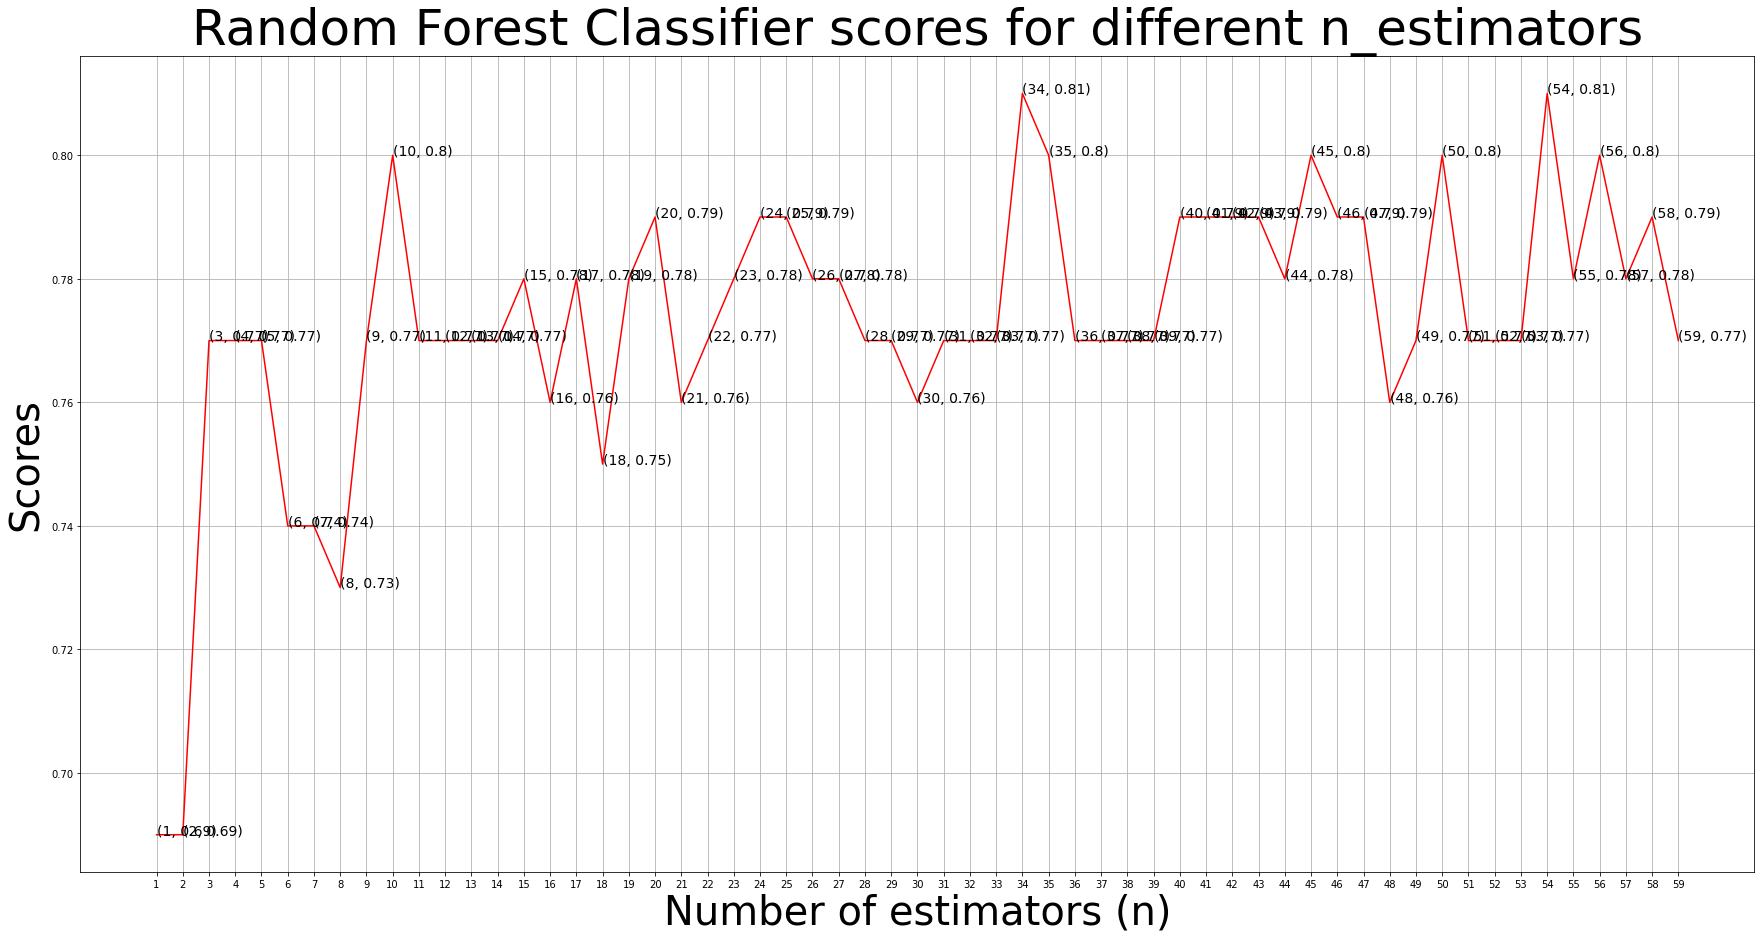

In [28]:
plt.figure(figsize=(30,15))
plt.plot([i for i in range(1,60)], rfc_scores, color='red')
for i in range(1, 60):
    plt.text(i, rfc_scores[i-1],(i, rfc_scores[i-1]),fontsize=14)
plt.xticks([i for i in range(1,60)])    
plt.xlabel('Number of estimators (n)',fontsize=40)
plt.ylabel('Scores',fontsize=40)
plt.title('Random Forest Classifier scores for different n_estimators',fontsize=50)
plt.grid(True)

In [29]:
random_forest_clf = RandomForestClassifier(n_estimators=49)
score = cross_val_score(random_forest_clf, X, y, cv=10)

In [30]:
# accuracy
score.mean()

0.784367816091954

# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_scores = []
for max_depth in range(4,11):
    tree_clf = DecisionTreeClassifier(max_depth=max_depth)
    score = cross_val_score(tree_clf, X, y, cv=10)
    tree_scores.append(score.mean().round(2))

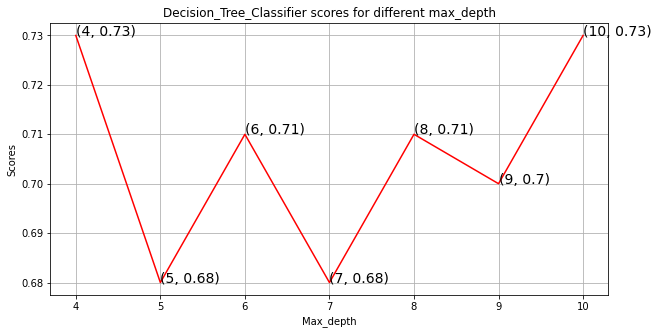

In [32]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(4,11)], tree_scores, color='red')
for i in range(4, 11):
    plt.text(i, tree_scores[i-4],(i, tree_scores[i-4]),fontsize=14)
plt.xticks([i for i in range(4,11)])    
plt.xlabel('Max_depth')
plt.ylabel('Scores')
plt.title('Decision_Tree_Classifier scores for different max_depth')
plt.grid(True)

In [33]:
tree_clf = DecisionTreeClassifier(max_depth=4)
score = cross_val_score(tree_clf, X, y, cv=10)

In [34]:
# accuracy
score.mean()

0.7059770114942528

In [35]:
n_features = X.columns
n_features

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_0', 'thal_1',
       'thal_2'],
      dtype='object')

In [36]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)                            

DecisionTreeClassifier(max_depth=4)

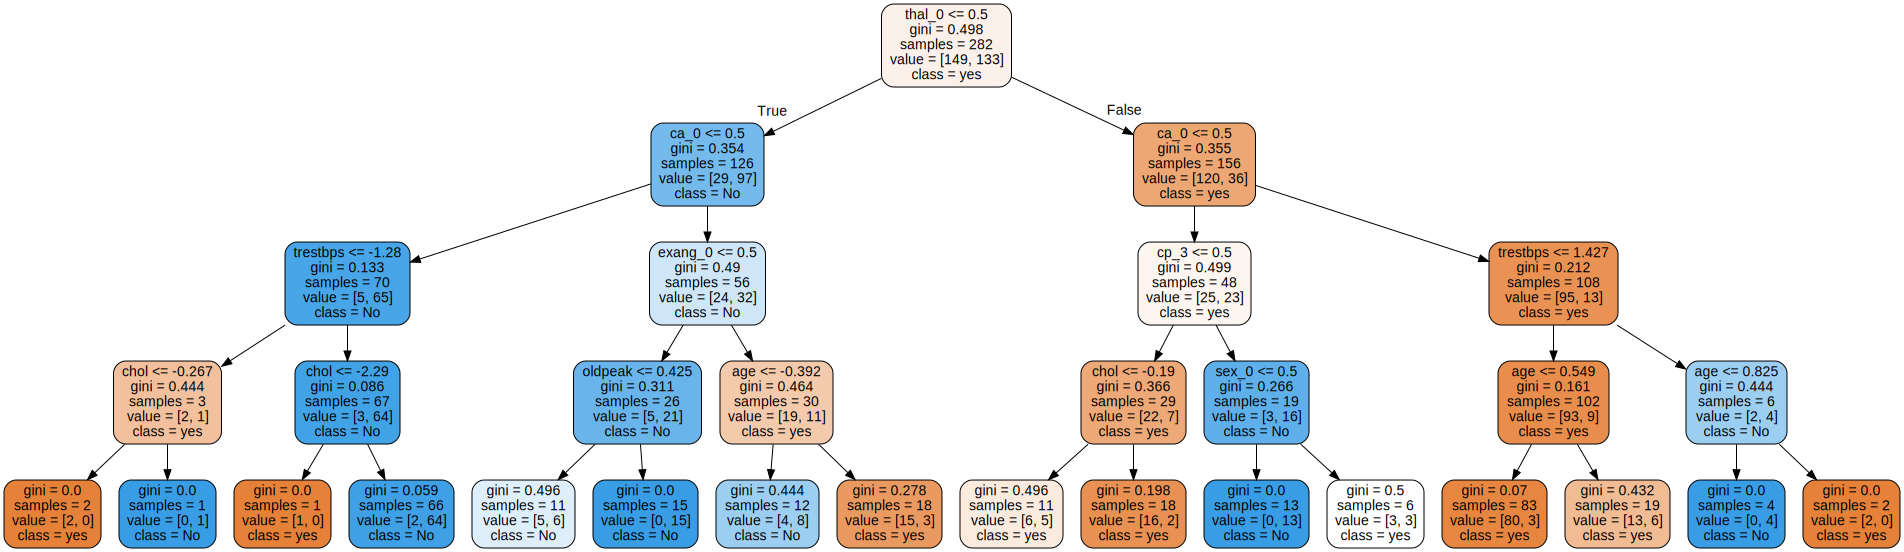

In [37]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        clf,
        out_file=os.path.join('.', "heart_tree.dot"),
        feature_names = n_features,
        class_names=['yes', 'No'],
        rounded=True,
        filled=True
    )
 
Source.from_file(os.path.join('.', "heart_tree.dot"))

# SVM

In [38]:
from sklearn.svm import SVC
svc_scores = []
for gamma in np.linspace(0.001,0.1,100):
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=1.0)
    score = cross_val_score(rbf_kernel_svm_clf, X, y, cv=10)
    svc_scores.append(score.mean().round(2))

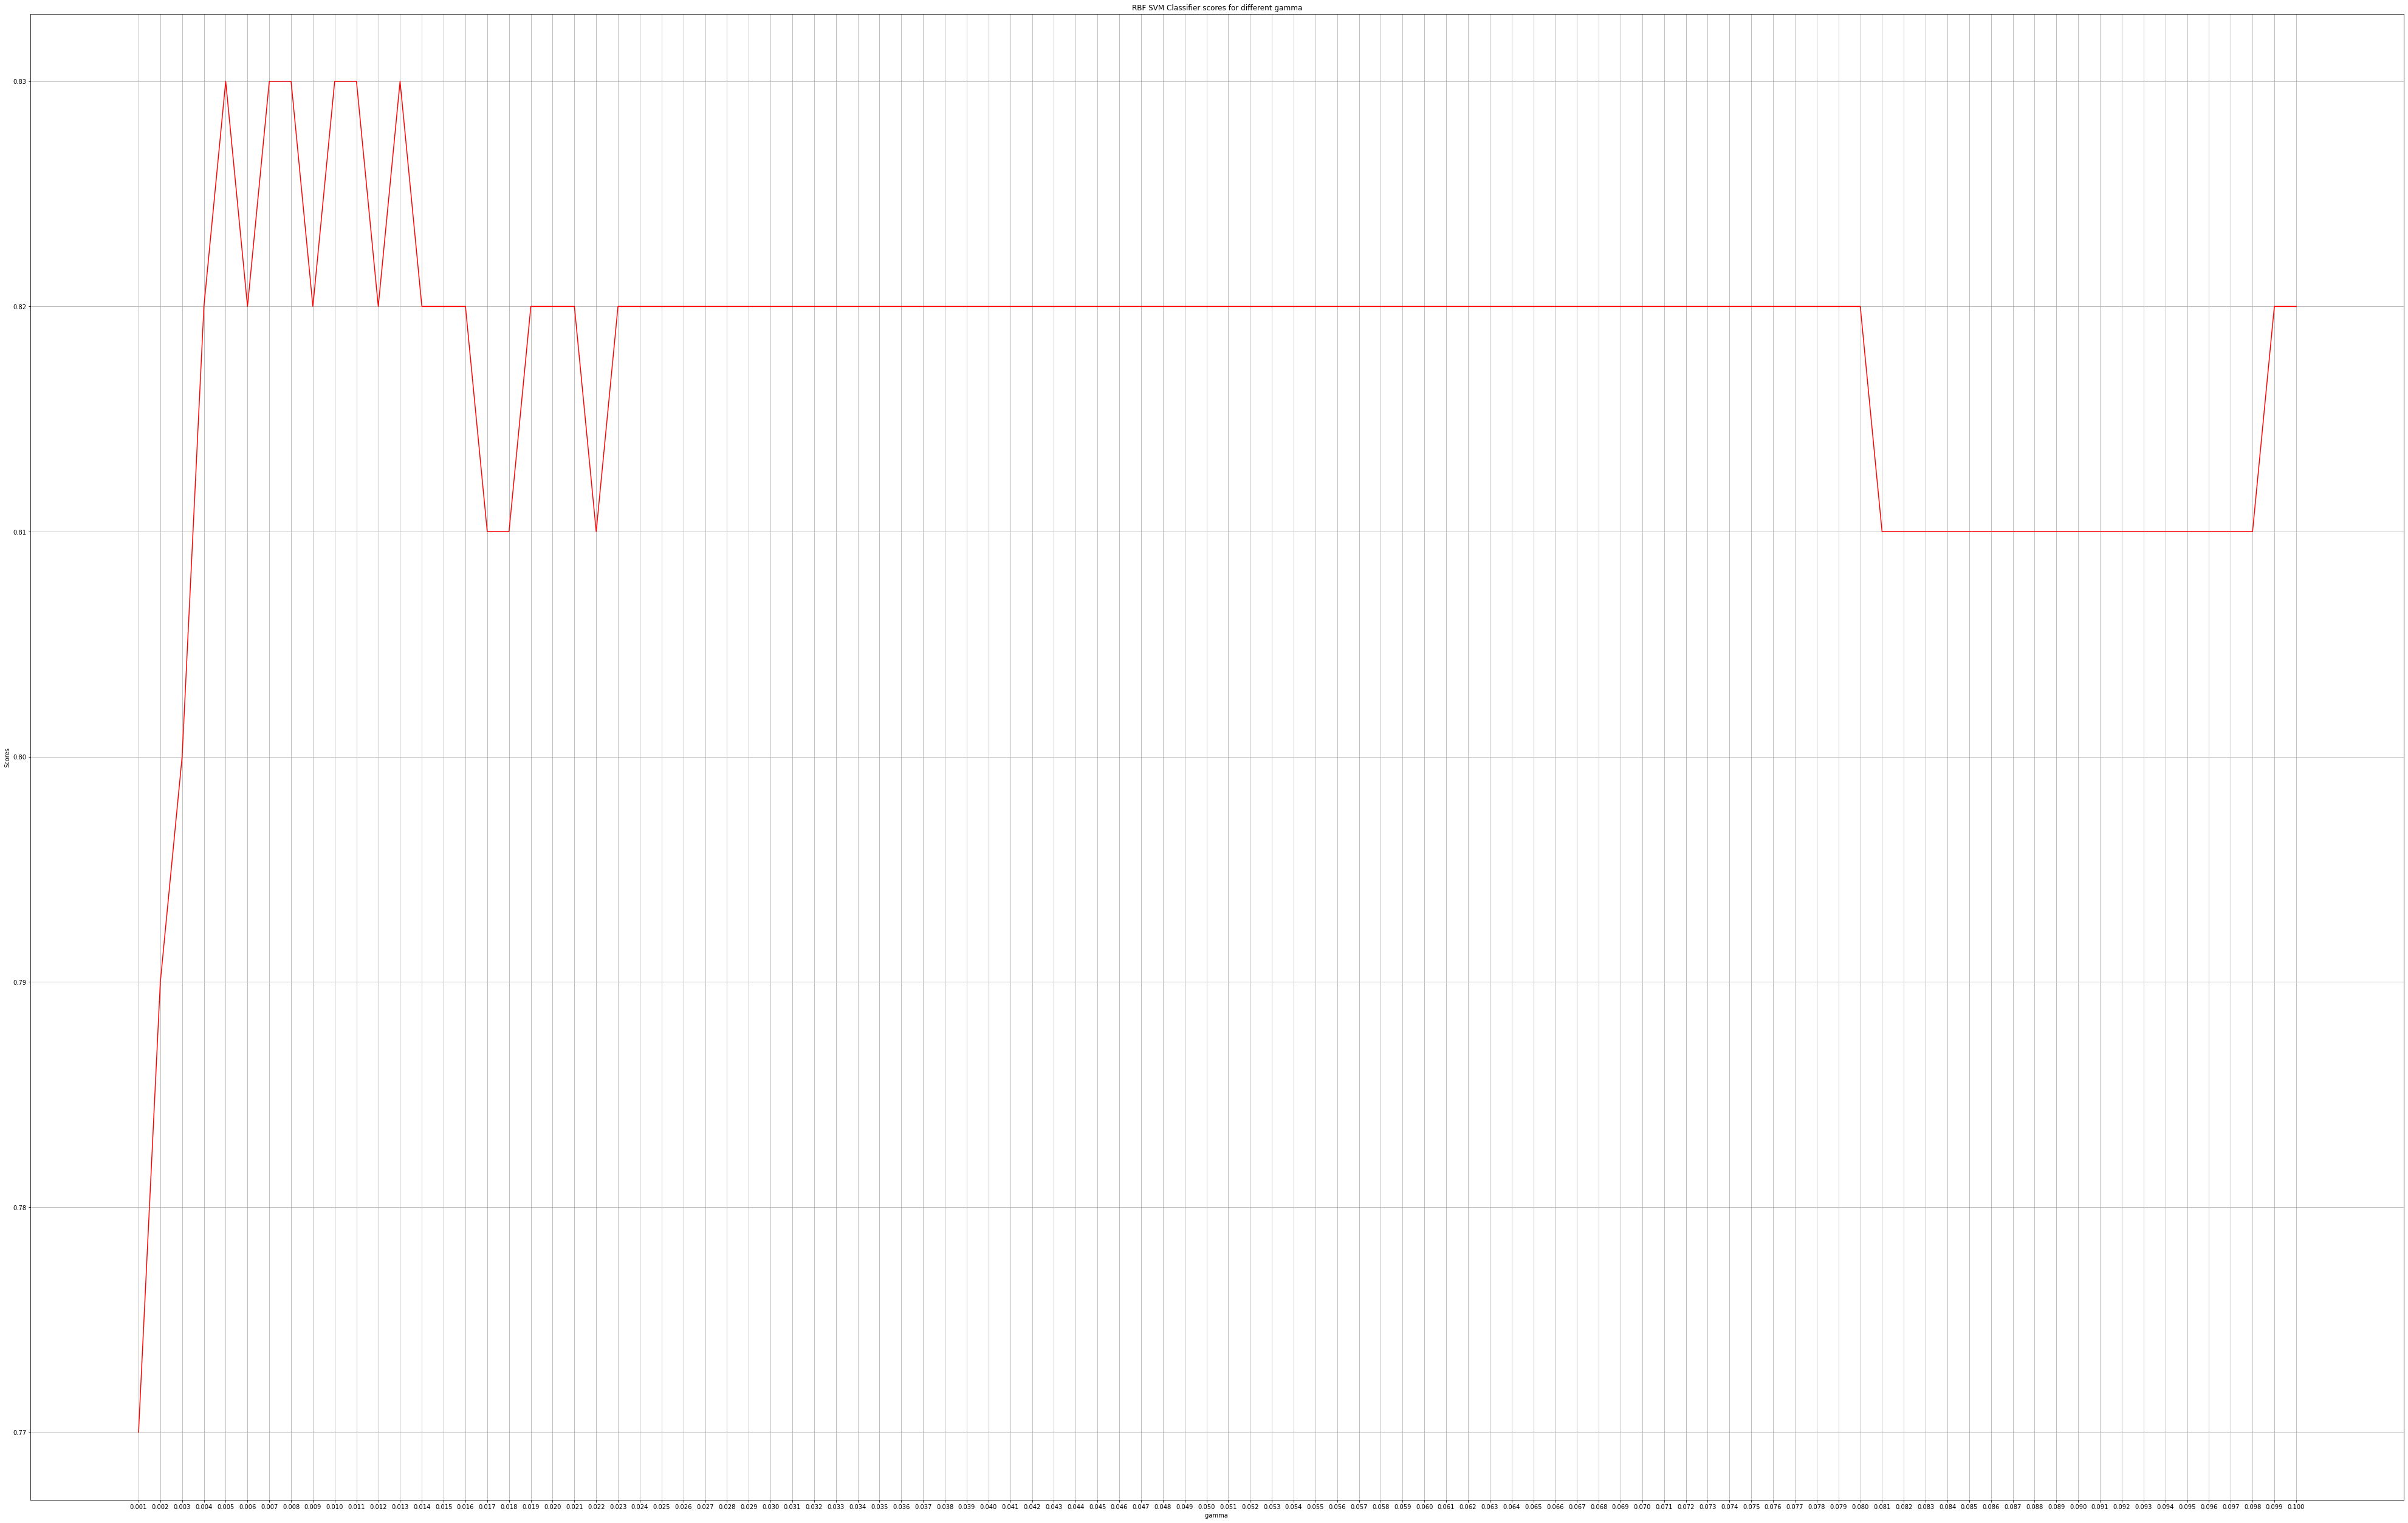

In [39]:
plt.figure(figsize=(70,45))
plt.plot([i for i in np.linspace(0.001,0.1,100)], svc_scores, color='red')
# for i in np.linspace(0.01,1,10):
#     plt.text(i, svc_scores[i-1],(i, svc_scores[i-1]))
plt.xticks([i for i in np.linspace(0.001,0.1,100)])    
plt.xlabel('gamma ')
plt.ylabel('Scores')
plt.title('RBF SVM Classifier scores for different gamma')
plt.grid(True)

In [40]:
svm_rbf_clf = SVC(kernel="rbf", gamma=0.013)
score = cross_val_score(svm_rbf_clf, X, y, cv=10)

In [41]:
# accuracy        for gamma = [0.005,0.007,0.008,0.010,0.011,0.013]
score.mean()

0.8281609195402299

# Accuracy 


1-Logistic Regression = 82.14%

2-KNeighbors Classifier = 82.80%

3-Random Forest Classifier = 77.43%

4-Decision Tree Classifier = 70.59%

5-SVM Classifier = 82.81%

Naive bayes 

xgboost

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb_clf = GaussianNB()
score = cross_val_score(gnb_clf, X, y, cv=10)

In [45]:
# accuracy
score.mean()

0.781264367816092

In [46]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [47]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [49]:
classifier = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [50]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [51]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 4.84 seconds.


In [52]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, eval_metric='logloss', gamma=0.0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [55]:
Classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, eval_metric='logloss', gamma=0.0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [56]:
score = cross_val_score(Classifier, X, y, cv=10)

In [57]:
# accuracy
score.mean()

0.7673563218390804

# Conclusion

In [ ]:
KNeighbor